# Problema de Negócio: 
### Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas em Janeiro/2024?

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando os dados 

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.shape

(365, 2)

In [4]:
data.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [5]:
data.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [6]:
data.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


## Pré-Processamento dos Dados 

In [7]:
data["Data"].min()

'2023-01-01'

In [8]:
data["Data"].max()

'2023-12-31'

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [10]:
data.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


In [11]:
# Converte a coluna de data no tipo datetime
data["Data"] = pd.to_datetime(data["Data"])

In [12]:
data.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [13]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [14]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = data.set_index('Data')['Total_Vendas']

Pego o DataFrame e chamo a função set_index(), o índice agora será a coluna de data, a coluna de dado será Total_Vendas.

In [15]:
type(serie_temporal)

pandas.core.series.Series

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

Para finalizar, precisa de mais uma etapa. Tenho que dizer explicitamente qual é a frequência da série. 

In [17]:
# Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq("D")

Pode ser uma série diária, mensal, anual, por minuto, segundo, etc... Depende do fenômeno que estamos analisando.

In [18]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

Temos agora Freq: Diária, são valores de vendas que ocorrem por dia ao longo de 2023 

## Análise Exploratória

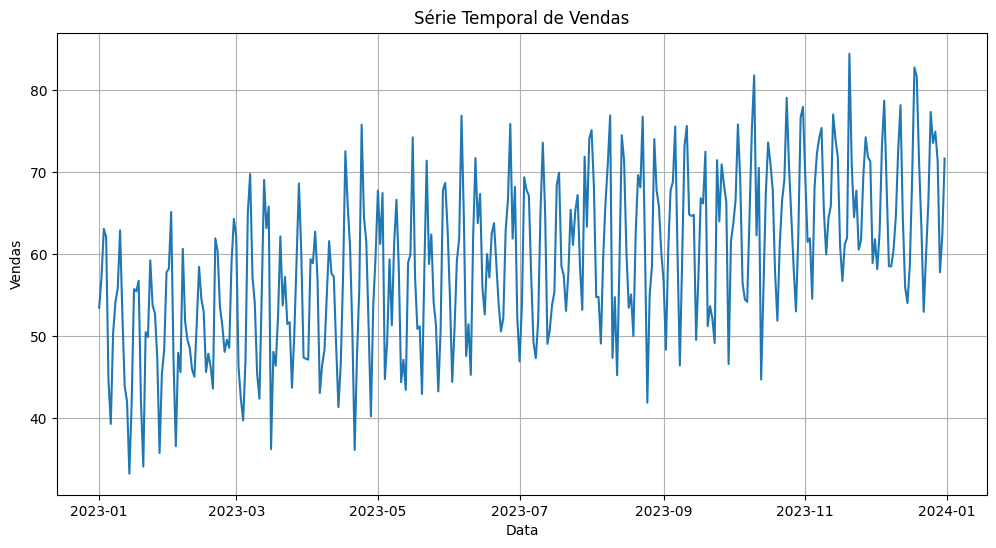

In [19]:
# Cria o gráfico da série temporal (sem formatação)
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Série Temporal de Vendas")
plt.grid(True) # Linhas de fundo
plt.show()

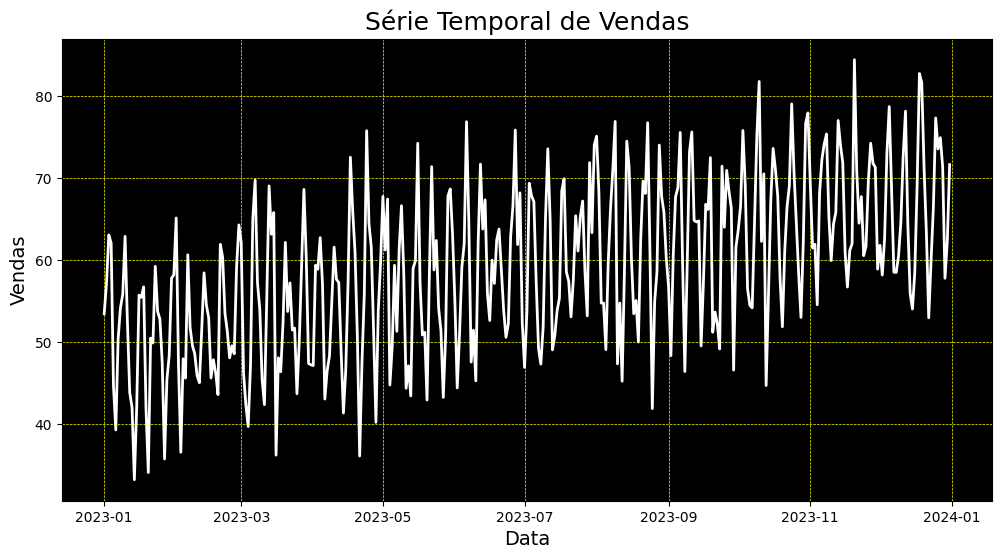

In [20]:
# Criar gráfico da série temporal com layout de contraste 
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = "white", linewidth = 2)

# Confrigurar cores e estilo do gráfico
plt.gca().set_facecolor("black")
plt.grid(color = "yellow", linestyle = "--", linewidth = 0.5)

# Confirgurar rótulos dos eixos, títulos e legenda
plt.xlabel("Data", color = "black", fontsize = 14)
plt.ylabel("Vendas", color = "black", fontsize = 14)
plt.title("Série Temporal de Vendas", color = "black", fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = "x", colors = "black")
plt.tick_params(axis = "y", colors = "black")

plt.show()

## Suavização Exponencial

In [21]:
# Cria o modelo de Suavização Exponencial
modelo = SimpleExpSmoothing(serie_temporal)

Esta linha acima cria uma instância da classe SimpleExpSmoothing, utilizando a coluna "Vendas" da série serie_temporal como entrada.

In [22]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

Por que do "smoothing_level = 0.2"? Eu não sei se 0.2 é o valor ideal, então vou experimentar. Temos várias técnicas para isso: posso automatizar a aexperimentação ou posso experimentar de maneira manual. Por exemplo: coloco 0.2, treino o modelo e verifico o resultado. Volto, coloco 0.3, treino e verifico o resultado. Isso até encontrar o valor ideal ou próximo do ideal.

In [23]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

Esta linha acima extrai os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses valores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização ou previsão.

O resultado final é uma nova série temporal chamada suavizacao_exponencial, que representa a versão suavizada da série original de vendas, com menos ruído e flutuações de curto prazo.

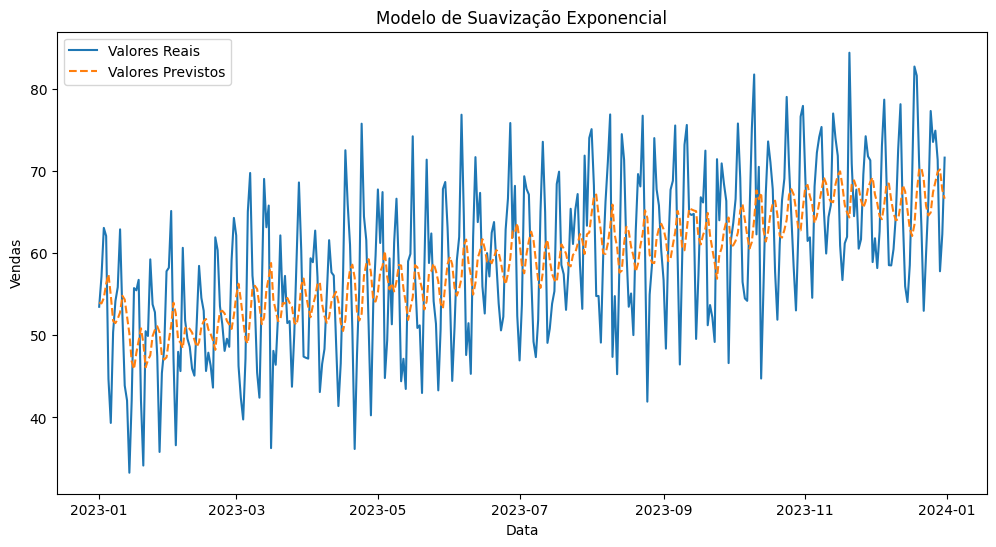

In [24]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = "Valores Reais ")
plt.plot(suavizacao_exponencial, label = "Valores Previstos", linestyle = "--")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Modelo de Suavização Exponencial")
plt.legend()
plt.show()

## Deploy e Previsão com o Modelo Treinado

In [29]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [30]:
print("Previsão do total de vendas para janeiro/2024:", round(previsoes[0], 4)) 

Previsão do total de vendas para janeiro/2024: 67.6499


round(previsoes[0], 4)) - 0 Porque estou buscando o primeiro valor, e arredondando para 4 casas decimais